In [1]:
# Getting access to the dataset and the Python files on Google Drive.
# You will probably have to give permission.

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['image.cmap'] = 'gist_earth'
np.random.seed(98765)

In [0]:
import sys
# Add the tf_unet folder path to the sys.path list
sys.path.append('/content/gdrive/My Drive/19 Spring/CS282/tf_unet_fiber/')


In [0]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util, image_util

In [0]:
#x_test, y_test = generator(1)

In [5]:
#Data input
#put your data here
path_images = "/content/gdrive/My Drive/19 Spring/CS282/Unet_data set/"
generator = image_util.ImageDataProvider(path_images+"*.tif")
#TODO: need to enhance the borders and rethink the matrix vs bkg 

Number of files used: 3
Number of channels: 1
Number of classes: 2


In [0]:
from skimage import io
x_test = io.imread(path_images+'0000.tif')
y_test = io.imread(path_images+'0000_mask.tif')

In [7]:
x_test.shape

(1750, 1750)

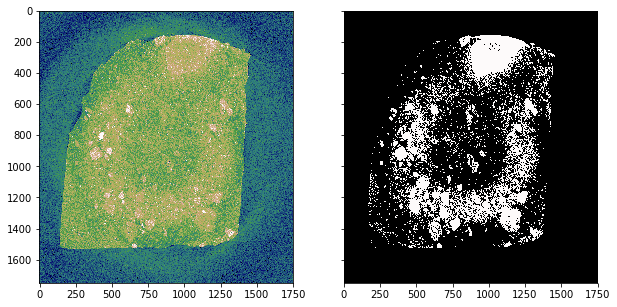

In [8]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(10,5))
ax[0].imshow(x_test, aspect="auto")
ax[1].imshow(y_test, aspect="auto")

In [0]:
np.max(generator(4)[1][0,:,:,1])

1.0

In [9]:
net = unet.Unet(channels=1, n_class=2, layers=4, features_root=16)

2019-04-13 19:48:40,849 Layers 4, features 16, filter size 3x3, pool size: 2x2


Instructions for updating:
Colocations handled automatically by placer.


2019-04-13 19:48:40,877 From /usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2019-04-13 19:48:40,915 From /content/gdrive/My Drive/19 Spring/CS282/tf_unet_fiber/tf_unet/layers.py:39: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
trainer = unet.Trainer(net, batch_size=1, verification_batch_size = 1, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

In [16]:
path = trainer.train(generator, "./unet_trained", training_iters=12, epochs=3, display_step=2)

2019-04-13 19:56:28,563 Removing '/content/prediction'
2019-04-13 19:56:28,567 Removing '/content/unet_trained'
2019-04-13 19:56:28,569 Allocating '/content/prediction'
2019-04-13 19:56:28,571 Allocating '/content/unet_trained'
2019-04-13 19:56:30,268 Verification error= 17.3%, loss= 0.6678
2019-04-13 19:56:31,635 Start optimization
2019-04-13 19:56:40,768 Iter 0, Minibatch Loss= 0.6159, Training Accuracy= 0.8404, Minibatch error= 16.0%
2019-04-13 19:56:50,408 Iter 2, Minibatch Loss= 0.5456, Training Accuracy= 0.8404, Minibatch error= 16.0%
2019-04-13 19:56:59,860 Iter 4, Minibatch Loss= 0.5036, Training Accuracy= 0.8254, Minibatch error= 17.5%
2019-04-13 19:57:09,136 Iter 6, Minibatch Loss= 0.4807, Training Accuracy= 0.8254, Minibatch error= 17.5%
2019-04-13 19:57:18,422 Iter 8, Minibatch Loss= 0.4517, Training Accuracy= 0.8404, Minibatch error= 16.0%
2019-04-13 19:57:27,587 Iter 10, Minibatch Loss= 0.4651, Training Accuracy= 0.8271, Minibatch error= 17.3%
2019-04-13 19:57:29,364 Epoc

In [17]:
#x_test, y_test = generator(1)
h,w = x_test.shape
x = x_test.reshape(1,h,w,1)
prediction = net.predict("./unet_trained/model.ckpt", x)

INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-04-13 20:00:02,766 Restoring parameters from ./unet_trained/model.ckpt
2019-04-13 20:00:03,019 Model restored from file: ./unet_trained/model.ckpt


Text(0.5, 1.0, 'Prediction')

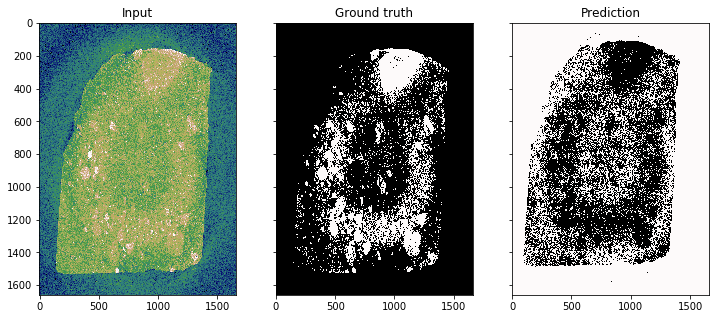

In [18]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test, aspect="auto")
ax[1].imshow(y_test, aspect="auto")
mask = prediction[0,...,1] > 0.1
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")

In [0]:
fig.tight_layout()
fig.savefig("../docs/toy_problem.png")

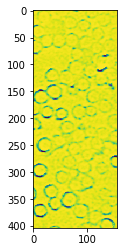

In [0]:
plt.imshow(prediction[0,...,0], cmap='viridis')